Нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.

## Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

- Проведите первичный анализ.

- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками.

- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.

- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

- Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?


In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Первичный анализ

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

### Проверка пропусков

In [ ]:
data[data['income'].isna()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


Пропусков нет

### Визуализация данных

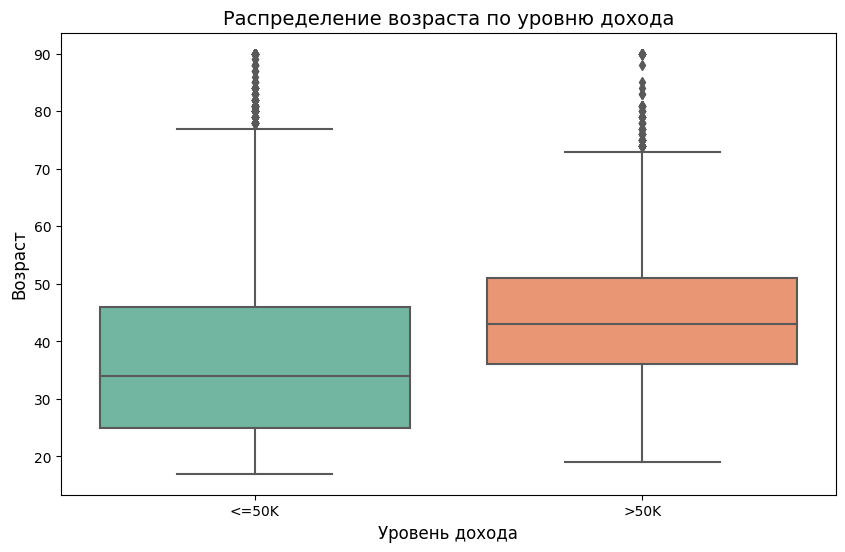

In [ ]:
import seaborn as sns

# Создаем боксплот для возраста и уровня дохода
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data, palette='Set2')
plt.xlabel('Уровень дохода', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.title('Распределение возраста по уровню дохода', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


На этом графике мы можем видеть, как возраст распределен в зависимости от уровня дохода. График поможет нам понять, есть ли какие-либо явные различия в возрасте между группами с доходом <=50K и >50K. Например, мы можем определить, что средний возраст людей с доходом >50K выше, чем у тех, у кого доход <=50K.

In [ ]:
selectedColumns = data[['age', 'native-country', 'income']]
selectedColumns.head()

,age,native-country,income
0,25,United-States,<=50K
1,38,United-States,<=50K
2,28,United-States,>50K
3,44,United-States,>50K
4,18,United-States,<=50K


In [ ]:
selectedColumns['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### Преобразование категориальные значения

In [ ]:
# столбец native-country - категориальная переменная
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns=['native-country'])

# столбец income является целевой переменной, удаляем его из Х
del X['income']

print('Пометили страну физического лица единичкой.')
X.head()

Пометили страну физического лица единичкой.


,age,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### Обучение модель логистической регрессии
Поделим данные на обучающую выборку и тестовую.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0])

In [ ]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.62759757, 0.37240243],
       [0.84819961, 0.15180039],
       [0.7358625 , 0.2641375 ],
       ...,
       [0.84819961, 0.15180039],
       [0.87987076, 0.12012924],
       [0.66297618, 0.33702382]])

### Получение точности предсказания на обучающей и тестовой выборках

In [ ]:
model.score(X_train, y_train)

0.7461674301947636

In [ ]:
model.score(X_test,y_test)

0.7522776128569966

Качество модели на обучающей и тестовой выборке получается одинаково

### Обучение модель опорных векторов

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train)

0.7595270391318814

In [ ]:
clf.score(X_test, y_test)

0.7655850138192241

Качество модели на обучающей и тестовой выборке получается одинаково

# По итогу было совершенно:


*   Первичный анализ данных
*   Визуализацию распределения возраста по уровню дохода
*   Преобразовала категориальные признаки (а именно столбец native-country)
*   Построила и обучила модель логистической регрессии и модель опорных векторов


На обеих моделях качество получилось примерно одинаковое **(0.75)**, получился хороший результат. Модели справились с задачей.